In [1]:
from ogb.nodeproppred import NodePropPredDataset
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader

dataset = NodePropPredDataset(name="ogbn-arxiv")
graph, label = dataset[0]

C:\Users\saise\AppData\Roaming\Python\Python311\site-packages\torch_geometric\typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not find module 'C:\Users\saise\AppData\Roaming\Python\Python311\site-packages\torch_sparse\_convert_cuda.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [13]:
import numpy as np

# Original edge index
edge_index = np.array([[104447, 15858, 107156, 45118, 45118, 45118],
                       [13091, 47283, 69161, 162473, 162537, 72717]])

# Make the edge index bidirectional
bidirectional_edge_index = np.concatenate((edge_index, edge_index[::-1]), axis=1)

# Check the output using assert statement
assert np.array_equal(bidirectional_edge_index[:, :edge_index.shape[1]], edge_index)
assert np.array_equal(bidirectional_edge_index[:, edge_index.shape[1]:], edge_index[::-1])

In [7]:
edge_index[::-1]

array([[ 13091,  47283,  69161, 162473, 162537,  72717],
       [104447,  15858, 107156,  45118,  45118,  45118]])

In [6]:
np.concatenate((edge_index, edge_index[::-1]), axis=1)

array([[104447,  15858, 107156,  45118,  45118,  45118,  13091,  47283,
         69161, 162473, 162537,  72717],
       [ 13091,  47283,  69161, 162473, 162537,  72717, 104447,  15858,
        107156,  45118,  45118,  45118]])

In [2]:
degree_dist = {k:0 for k in range(graph['node_feat'].shape[0])}
for edge in graph['edge_index']:
    for node in edge:
        degree_dist[node]+=1

degrees = [v for k,v in degree_dist.items()]

In [3]:
import matplotlib.pyplot as plt

# code taken from notebook given by professor
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data :
        if item not in counts :
            counts [ item ] = 0
        counts [ item ] += 1
    counts = sorted ( counts.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.scatter ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if xlog == True:
        ax.set_xscale ( 'log')
    if ylog == True:
        ax.set_yscale ( 'log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel ( xlabel)
    ax.set_ylabel ( ylabel )
    plt.title ( title )

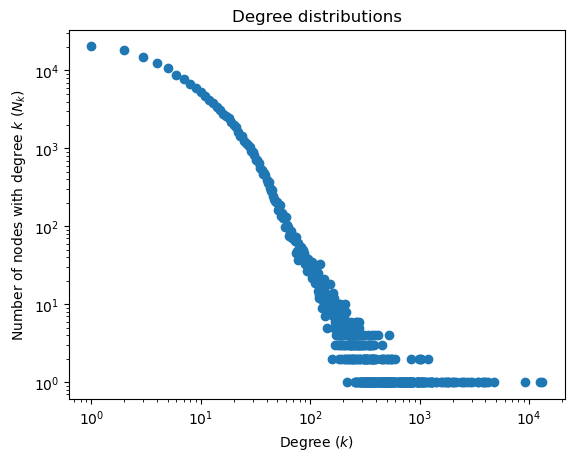

In [4]:
plot_distribution(degrees, xlabel='Degree ($k$)', 
                    ylabel='Number of nodes with degree $k$ ($N_k$)', title='Degree distributions')